# Generowanie losowych obiektów w Pythonie. Znane rozkłady prawdopodobieństwa w Pythonie. 

## Biblioteka NumPy

**NumPy** (Numerical Python) jest biblioteką dla języka Python, której głównym zadaniem jest umożliwienie pracy na dużych, wielowymiarowych tabelach i macierzach. Zacznijmy od zaimportowania biblioteki za pomocą poniższego polecenia.

In [13]:
import numpy as np

Ponieważ głównym obiektem biblioteki NumPy są macierze, czyli obiekty klasy `ndarray` (N dimensional array), zobaczmy na początek w jaki sposób z nimi pracować. Obiekty tego typu mają zazwyczaj ustalony rozmiar, który wyznaczony jest przez kształt macierzy, czyli `shape`. Np. `shape = (2,2,4)` dotyczy macierzy trójwymiarowej o wymiarach $2\times 2\times 4$ i $2\cdot 2\cdot 4 = 16$ polach.

In [37]:
# tworzymy macierz typu ndarray
A = np.array([[1, 2, 3], [2, 3, 4]])
print("Macierz A\n", A, "\n")

# tworzymy macierz o wymiarach 3x4 składającą się z samych jedynek
A_ones = np.ones((3, 4))
print("Macierz jedynek\n", A_ones, "\n")

# tworzymy macierz o w ymiarach 2x2 składającą się z samcyh zer
A_zeros = np.zeros((2, 2))
print("Macierz zer\n", A_zeros)

Macierz A
 [[1 2 3]
 [2 3 4]] 

Macierz jedynek
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]] 

Macierz zer
 [[0. 0.]
 [0. 0.]]


Na macierzach możemy wykonywać standardowe działania takie jak mnożenie, co przyda nam się na późniejszych zajęciach przy okazji pracy z łańcuchami Markowa.

In [54]:
# Tworzymy macierz B o wymiarach 4x2 oraz wektor v
B = np.array([[1, 2], [1, 4], [5, 0], [5, 1]])
v = np.array([1, 2])
print("Macierz B\n", B, "\n")
print("Wektor v\n", v, "\n")

# Mnożenie macierzy B przez wektor v
result = B.dot(v)
print("Wynik mnożenia B przez v\n", result)

Macierz B
 [[1 2]
 [1 4]
 [5 0]
 [5 1]] 

Wektor v
 [1 2] 

Wynik mnożenia B przez v
 [5 9 5 7]


## Generowanie losowych obiektów w NumPy

Na tym kursie interesować nas będzie przede wszystkim zastosowanie biblioteki NumPy w odniesieniu do rachunku prawdopdodobieństwa.

Podstawowym narzędziem, z którego będziemy korzystać jest generator liczb (i innych obiektów) losowych (a dokładniej rzecz ujmując pseudolosowych). Aby wygenerować losową liczbę całkowitą możemy posłużyć się funkcją `randint(n)` (zwracającą losową liczbę całkowitą z przedziału `[0, n)` zgodnie z **rozkładem jednostajnym**, czyli takim, gdzie każda liczba z podanego przedziału ma szanse pojawić się z równym prawdopodobieństwem).

In [23]:
# generujemy 10 liczb losowych z przedziału [0,100]
for _ in range(10):
    x = np.random.randint(100)
    print(x)

10
96
75
0
32
51
61
25
4
7


In [20]:
# generujemy tablicę typu ndarray o wymiarach 2 x 10 wypełnioną losowymi liczbami całkowitymi z przedziału [0, 100]

x = np.random.randint(100, size=(2, 10))
print(x)

[[60 12 38 99 87 40 22 92 79 66]
 [27 30 90 72 35 52 67 80 51 26]]


NumPy daje nam również możliwość losowania dowolnych obiektów. Służy do tego funkcja `choice`, która przyjmuje następujące argumenty:
 - `a` - może być jednowymiarową macierzą typu `ndarray`, wówczas losowane są elementy z tej macierzy, `a` może być też liczbą naturalną, wówczas losowane są liczby naturalne z przedziału `[0, a]`,
 - `size` - determinuje ile obiektów jest losowanych, może być to liczba lub wektor liczb, domyślnie `size` przyjmuje wartość `None`co oznacza, że losowany jest jeden obiekt,
 - `replace` - czy losujemy ze zwracaniem, czy bez zwracania, domyślnie przyjmuje wartość `True` co oznacza, że dany obiekt może zostać wylosowany wielokrotnie,
 - `p` - wektor prawdopodobieństw, jeśli chcemy by losowanie odbywało się nie w sposób jednostajny, tylko ze z góry zadanym rozkładem.
 
 **Przykład 1**
 
 Chcemy wylosować:
  - jedną kartę
  - $5$ kart otrzymanych przez pojedynczego gracza
  - rozdanie po $5$ kart dla czterech graczy
  
 ze standardowej talii $52$ kart. W tym celu najpierw definiujemy talię, a następnie stosujemy funkcję `choice` z odpowiednimi parametrami.

In [25]:
# tworzymy standardową talię 52 kart
values = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Walet', 'Dama', 'Król', 'As']
suits = ['kier', 'karo', 'pik', 'trefl']
deck = [v + ' ' + s for v in values for s in suits]

# losujemy jedną kartę z naszej talii
x = np.random.choice(deck)
print("Losowa karta:", x, "\n")

# losujemy jednocześnie 5 kart z naszej talii, domyślnie parametr replace = True, co oznacza że losujemy kolejno ze zwracaniem
y = np.random.choice(deck, size=5, replace=False)
print("Rozdanie 5 losowych kart dla jednego gracza: ", y, "\n")

# losujemy jedocześnie 5 kart z naszej talii dla 4 różnych graczy
z = np.random.choice(deck, size=(4, 5), replace=False)
print("Rozdanie po 5 losowych kart dla czterech graczy: \n", z)

Losowa karta: 10 karo 

Rozdanie 5 losowych kart dla jednego gracza:  ['7 trefl' '7 kier' '5 karo' 'As pik' '2 pik'] 

Rozdanie po 5 losowych kart dla czterech graczy: 
 [['2 pik' '10 karo' '5 trefl' '9 pik' '8 kier']
 ['3 karo' '9 kier' '5 kier' '5 pik' '4 karo']
 ['6 trefl' '2 kier' 'Walet trefl' '4 kier' '6 kier']
 ['4 trefl' 'Dama kier' 'Król trefl' 'Dama trefl' '7 trefl']]


**Przykład 2**

Chcemy wylosować $10$ razy ze zwracaniem jedną kulę z urny zawierającej $3$ białe, $4$ czerwone i  $5$ zielonych kul. Możemy tutaj zastosować dwa podejścia:
 - losujemy w sposób jednostajny jeden obiekt z tablicy zawierającej $3+4+5=12$ elementów, które odpowiadają naszym kulom,
 - losujemy jeden z kolorów zgodnie z rozkładem, który odpowiada częstotliwościom występowania każdego z kolorów, czyli przyjmując wektor prawdopodobieństw $p = (3/12, 4/12, 5/12)$.

In [35]:
# pierwszy sposób
kule = ['b', 'b', 'b', 'c', 'c', 'c', 'c', 'z', 'z', 'z', 'z', 'z']
x = np.random.choice(kule, size=10)
print(x)

# drugi sposób
kolory = ['b', 'c', 'z']
prawdop = [1/4, 1/3, 5/12]
y = np.random.choice(kolory, size=10, p=prawdop)
print(y)

['b' 'c' 'c' 'b' 'b' 'z' 'z' 'b' 'z' 'z']
['b' 'b' 'b' 'b' 'z' 'b' 'z' 'c' 'z' 'b']


Przeprowadźmy teraz $1000$-krotne losowanie ze zwracaniem kuli z naszej urny i porównajmy częstotliwość wyboru każdego z kolorów z częstotliwością występowania tego koloru w urnie. Proszę zauważyć, że
$$(3/12, 4/12, 5/12) = (0{.}25, 0{.}333\ldots, 0{.}41666\ldots) = (0{.}25, 0{.}(3)), 0{.}41(6)).$$
Jeśli nasz generator faktycznie zwraca obiekty w sposób losowy, spodziewamy się, że uzyskane częstotliwości występowania kolorów podczas losowania będą odpowiadały częstotliwościom występowania każdego z kolorów w urnie.

In [36]:
x = np.random.choice(kolory, size=1000, p=prawdop)

# Zliczanie wystąpień konkretnego elementu, np. 'b'
b_count = np.count_nonzero(x == 'b')
print("Częstotliwość wystąpień koloru białego:", b_count/1000)
c_count = np.count_nonzero(x == 'c')
print("Częstotliwość wystąpień koloru czerwonego:", c_count/1000)
z_count = np.count_nonzero(x == 'z')
print("Częstotliwość wystąpień koloru zielonego:", z_count/1000)

Częstotliwość wystąpień koloru białego:  0.252
Częstotliwość wystąpień koloru czerwonego:  0.304
Częstotliwość wystąpień koloru zielonego:  0.444


## SciPy

**SciPy** jest bogatą biblioteką, która umożliwia wykonywanie skomplikowanych obliczeń tj. całkowanie czy optymalizacja. My natomiast wykorzystamy funkcje związane ze znanymi rozkładami prawdopodobieństwa dostępne dzięki pakietowi `stats`. Będą nas interesowały już poznane rozkłady dyskretne:
 - rozkład Bernoulliego (dla pojedynczej próby): `bernoulli`
 - rozkład dwumianowy: `binom`
 - rozkład geometryczny: `geom`
 - rozkład Poissona: `poisson`
 - rozkład hipergeometryczny: `hypergeom`
 - rozkład Pascala (ujemny dwumianowy): `nbinom`
 - rozkład jednostajny (na skończonym zbiorze liczb): `randint`
 
 a także rozkłady ciągłe:
 - rozkład jednostajny: `uniform`
 - rozkład wykładniczy: `expon`
 - rozkład standardowy normalny: `norm`.
 
 Zacznijmy od zaimportowania odpowiedniego pakietu: `stats`.

In [4]:
from scipy import stats

Omówimy teraz pokrótce niektóre z wyżej wymienionych rozkładów. Przy czym należy pamiętać, że dla każdego z rozkładów zdefiniowane są podobne metody, zatem nie będziemy ich za każdym razem powtarzać. Metody, z których będziemy najcześciej korzystać przy okazji **rozkładów dyskretnych** to:
 - `pmf` czyli **funkcja masy prawdopodobieństwa** (*ang. probability mass function*),
 - `cdf` czyli **dystrybuanta** (*ang. cumulative distribution function*),
 - `mean` czyli **wartość oczekiwana** (*ang. mean value* or *expectation*),
 - `var` czyli **wariancja** (*ang. variance*),
 - `std` czyli **odchylenie standardowe** (*ang. standard deviation*) będące po prostu pierwiastkiem z wariancji,
 - `rvs` czyli funkcja zwracająca **losową próbkę** (*ang. random sample*) zgodnie z rozkładem zadanej zmiennej losowej 
 
 Z kolei do pracy z **rozkładami ciągłymi**, poza wyżej wymienionymi metodami (oprócz `pmf`, która nie ma sensu dla rozkładów ciągłych) przyda nam się dodatkowo metoda:
  - `pdf` czyli **gęstość rozkładu** (*ang. probability density function*).

### Rozkład dwumianowy stats.binom

Przypomnijmy, że rozkład dwumianowy $Bin(n,p)$ z parametrami $n$ i $p$ dotyczy $n$ niezależnych prób Bernoulliego z prawdopodobieństwem sukcesu w pojedynczej próbie wynoszącym $p \in (0,1)$, a zmienna losowa o tym rozkładzie zwraca liczbę uzyskanych sukcesów. Do wygenerowania takiej zmiennej losowej służy funkcja `stats.binom` przyjmująca dwa argumenty $n$ i $p$.
 
 **Przykład 3**
 
 Wyznaczymy funkcję masy prawdopodobieństwa, wartość oczekiwaną oraz wariancję zmiennej losowej $X$, która zlicza liczbę czwórek wyrzuconych w $12$ rzutach standardową kostką. Wiemy zatem, że $$X \sim Bin(12, 1/6).$$

In [9]:
# definiujemy zmienną losową X o dwumianowym rozkładzie prawdopodobieństwa z parametrami n=12 i p=1/6
X = stats.binom(12, 1/6)
print("Funkcja masy prawdopodobieństwa zmiennej losowej X")
for k in range(13):
    print("P(X =", k,") = ", X.pmf(k))
print("Wartość oczekiwana zmiennej losowej X = ", X.mean())
print("Wariancja zmiennej losowej X = ", X.var())

Funkcja masy prawdopodobieństwa zmiennej losowej X
P(X = 0 ) =  0.11215665478461513
P(X = 1 ) =  0.2691759714830762
P(X = 2 ) =  0.29609356863138386
P(X = 3 ) =  0.19739571242092233
P(X = 4 ) =  0.08882807058941508
P(X = 5 ) =  0.028424982588612827
P(X = 6 ) =  0.006632495937342999
P(X = 7 ) =  0.001136999303544513
P(X = 8 ) =  0.00014212491294306426
P(X = 9 ) =  1.263332559493902e-05
P(X = 10 ) =  7.579995356963424e-07
P(X = 11 ) =  2.7563619479866997e-08
P(X = 12 ) =  4.593936579977831e-10
Wartość oczekiwana zmiennej losowej X =  2.0
Wariancja zmiennej losowej X =  1.6666666666666667


### Rozkład geometryczny

Rozkład geometryczny $Ge(p)$ z parametrem $p\in(0,1)$ dotyczy eksperymentu, w którym powtarzamy niezależne próby Bernoulliego z prawdopodobieństwem sukcesu w pojedynczej próbie równym $p$, do momentu uzyskania pierwszego sukcesu. Zmienna losowa o tym rozkładzie zwraca liczbę takich prób i możemy ją wygenerować za pomocą polecenia `stats.geom`. 

**Przykład 4**

Przedstawimy na wykresie funkcję masy prawdopodobieństwa zmiennej losowej o rozkładzie geometrycznym z parametrem $p=1/8=0{.}125$. Do rysowania wykresów korzystać będziemy z biblioteki **matplotlib**.

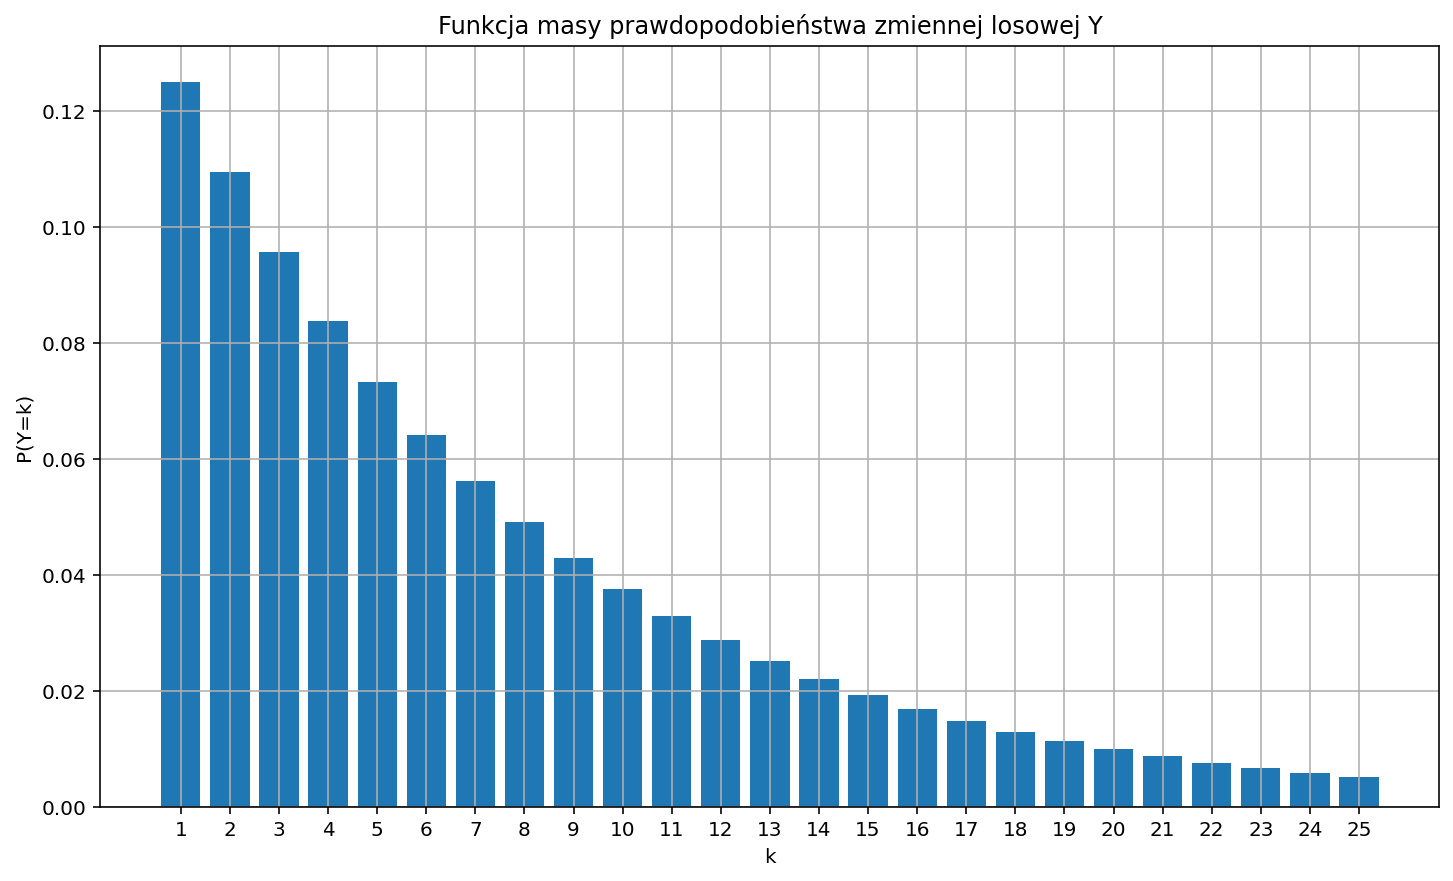

In [18]:
import matplotlib.pyplot as plt

# definiujemy zmienną losową Y o rozkładzie geometrycznym z parametrem p=0.125
Y = stats.geom(0.125)

# wartości do wykresu
x = np.arange(1, 26)
pmf_values = Y.pmf(x)

# tworzenie wykresu
plt.bar(x, pmf_values)
plt.title('Funkcja masy prawdopodobieństwa zmiennej losowej Y')
plt.xlabel('k')
plt.ylabel('P(Y=k)')
plt.xticks(x)
plt.grid()
plt.show()

### Rozkład Poissona

Zmienna losowa $X$ ma rozkład Poissona z parametrem $\lambda\in (0,+\infty)$, jeśli jej funkcja masy prawdopodobieństwa dana jest wzorem:

$$\mathbb{P}(X=k)=\frac{\lambda^k}{k!}e^{-\lambda} \quad \text{ dla } \quad k=0,1,2,\ldots$$

Rozkładu tego używamy najczęściej aby modelować zdarzenia ,,rzadkie'' np. liczbę wypadków drogowych, liczbę pożarów budynku itp. Wówczas parametr $\lambda$ odnosi się do średniej wartości tej zmiennej losowej. Zmienną losową o tym rozkładzie wygenerujemy za pomocą polecenia `stats.poisson`.

**Przykład 5**

Porównajmy ze sobą rozkład Poissona i rozkład dwumianowy. W tym celu rozważymy zmienną losową $X \sim Bin(n, \frac{\lambda}{n})$ oraz zmienną losową $Y \sim Po(\lambda)$, tak żeby
$$\mathbb{E}(X)  = n\cdot\frac{\lambda}{n} = \mathbb{E}Y.$$

Wygenerujemy funkcje masy prawdopodobieństwa dla obu tych rozkładów i dla porównania przedstawimy je na jednym wykresie. Jak się okazuje, dostajemy bardzo podobny rozkład prawdopodobieństwa, co nie jest przypadkiem, ponieważ rozkład dwumianowy $Bin(n,p)$ można dobrze przybliżać rozkładem Poissona $Po(\lambda)$ przy założeniu, że $p = \frac{\lambda}n$. Jako ćwiczenie proszę pozmieniać parametry $\lambda$, $n$ i $p=\frac{\lambda}{n}$.

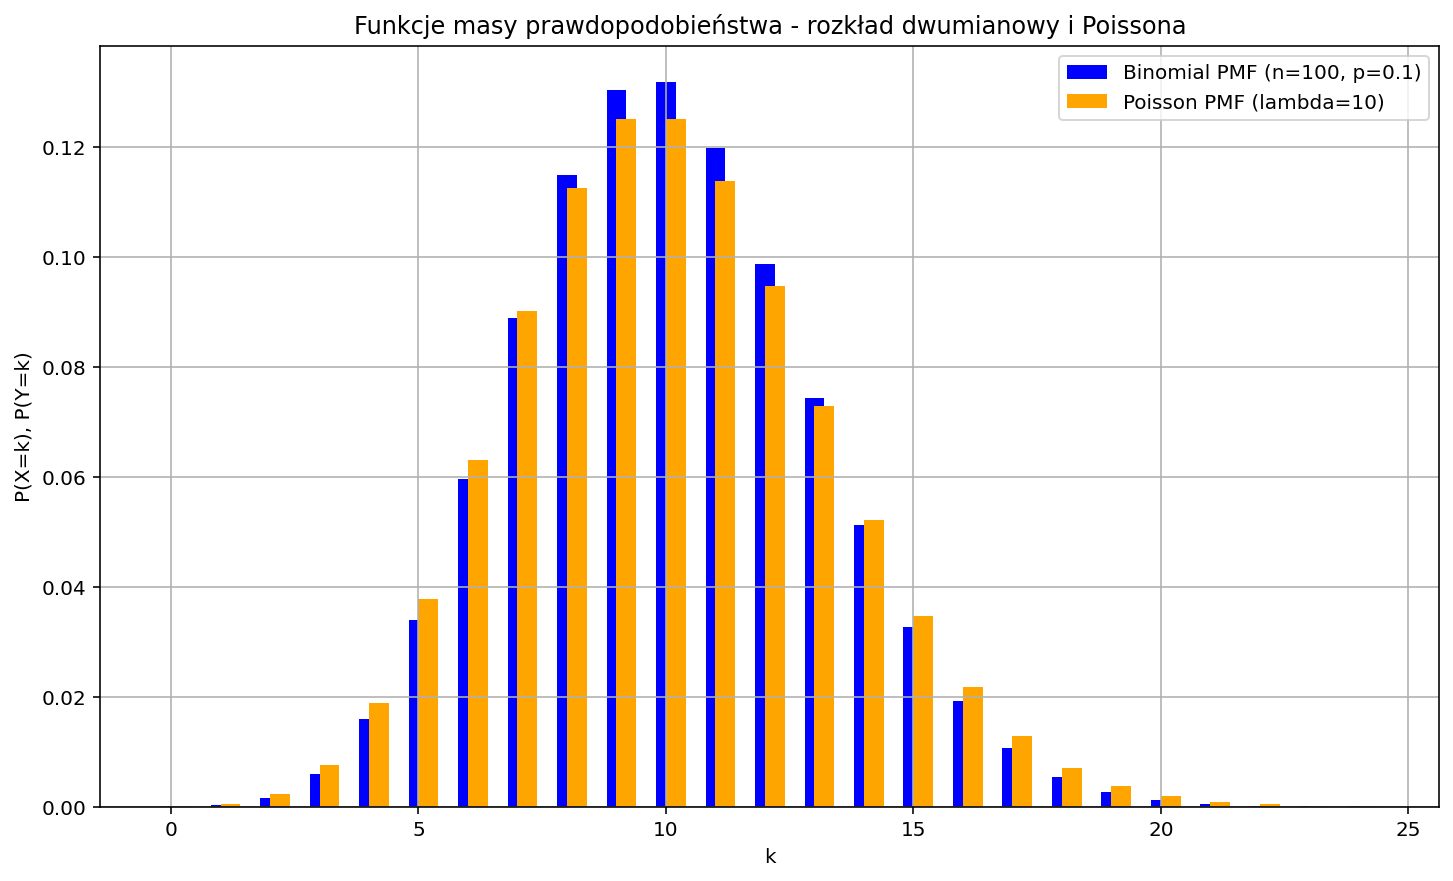

In [43]:
# definiujemy zmienną losową X o dwumianowym rozkładzie prawdopodobieństwa z parametrami n=100 i p=0.1
X = stats.binom(100, 0.1)
x_binom = np.arange(0, 25)  # wartości dla rozkładu dwumianowego
pmf_binom = X.pmf(x_binom)

# definiujemy zmienną losową Y o rozkładzie Poissona z parametrem lambda=10
Y = stats.poisson(10)
x_poisson = np.arange(0, 25)  # wartości dla rozkładu Poissona
pmf_poisson = Y.pmf(x_poisson)

# tworzenie wykresu dla obu rozkładów
plt.bar(x_binom, pmf_binom, width=0.4, label='Binomial PMF (n=100, p=0.1)', color='blue', align='center')
plt.bar(x_poisson, pmf_poisson, width=0.4, label='Poisson PMF (lambda=10)', color='orange', align='edge')

plt.title('Funkcje masy prawdopodobieństwa - rozkład dwumianowy i Poissona')
plt.xlabel('k')
plt.ylabel('P(X=k), P(Y=k)')
plt.legend()
plt.grid()
plt.show()

### Rozkład normalny

**Rozkład normalny** $\mathcal{N}(\mu, \sigma)$ jest przykładem rozkładu ciągłego i zadany jest przez **gęstość**
$$f_{\mu,\sigma}(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp\left(\frac{-(x-\mu)^2}{2\sigma^2} \right), $$
gdzie parametry $\mu$ i $\sigma$ oznaczają odpowiednio wartość oczekiwaną i odchylenie standardowe. Specjalnym przypadkiem jest **standardowy rozkład normalny** $\mathcal{N}(0, 1)$, czyli rozkład normalny o parametrach $\mu=0$ i $\sigma=1$, dla którego gęstość dana jest wzorem
$$f(x) = f_{1, 0}(x) = \frac{1}{\sqrt{2\pi}} \exp\left(\frac{-x^2} 2\right).$$ 
W przypadku rozkładów ciągłych prawdopodobieństwo wyznacza się poprzez obliczenie odpowiedniej całki oznaczonej. Np. jeśli $X\sim\mathcal{N}(0,1)$, to dla dowolnego zbioru (borelowskiego) $A$ zachodzi
$$\mathbb{P}(X\in A) = \int_{A} f(x)dx = \int_{A}  \frac{1}{\sqrt{2\pi}} \exp\left(\frac{-x^2} 2\right) dx,$$
co możemy interpretować w ten sposób, że pole pod wykresem gęstości na zbiorze $A$ jest szukanym prawdopodobieństwem, a tym samym 
$$\mathbb{P}(X\in \mathbb{R}) = \int_{-\infty}^{\infty} f(x)dx = 1.$$
Obliczanie takich całek w wielu sytuacjach jest bardzo skomplikowane (rozkład normalny jest tutaj dobrym przykładem) i wymaga zastosowania odpowiednich metod numerycznych.

Rozkład normalny jest jednym z najważniejszych rozkładów prawdopodobieństwa i ma ogromne zastosowanie przede wszystkim w statystyce. Zobaczmy na początek jak wygląda gęstość standardowego rozkładu normalnego. Ponieważ rozkład normalny z dowolnymi parametrami da się uzyskać ze standardowego rozkładu normalnego przez odpowiednie przeskalowanie, wykres ten będzie miał zawsze taki sam kształt a reprezentująca go krzywa zwana jest **krzywą Gaussa** lub **krzywą dzwonową** (ze względu na swój kształt).

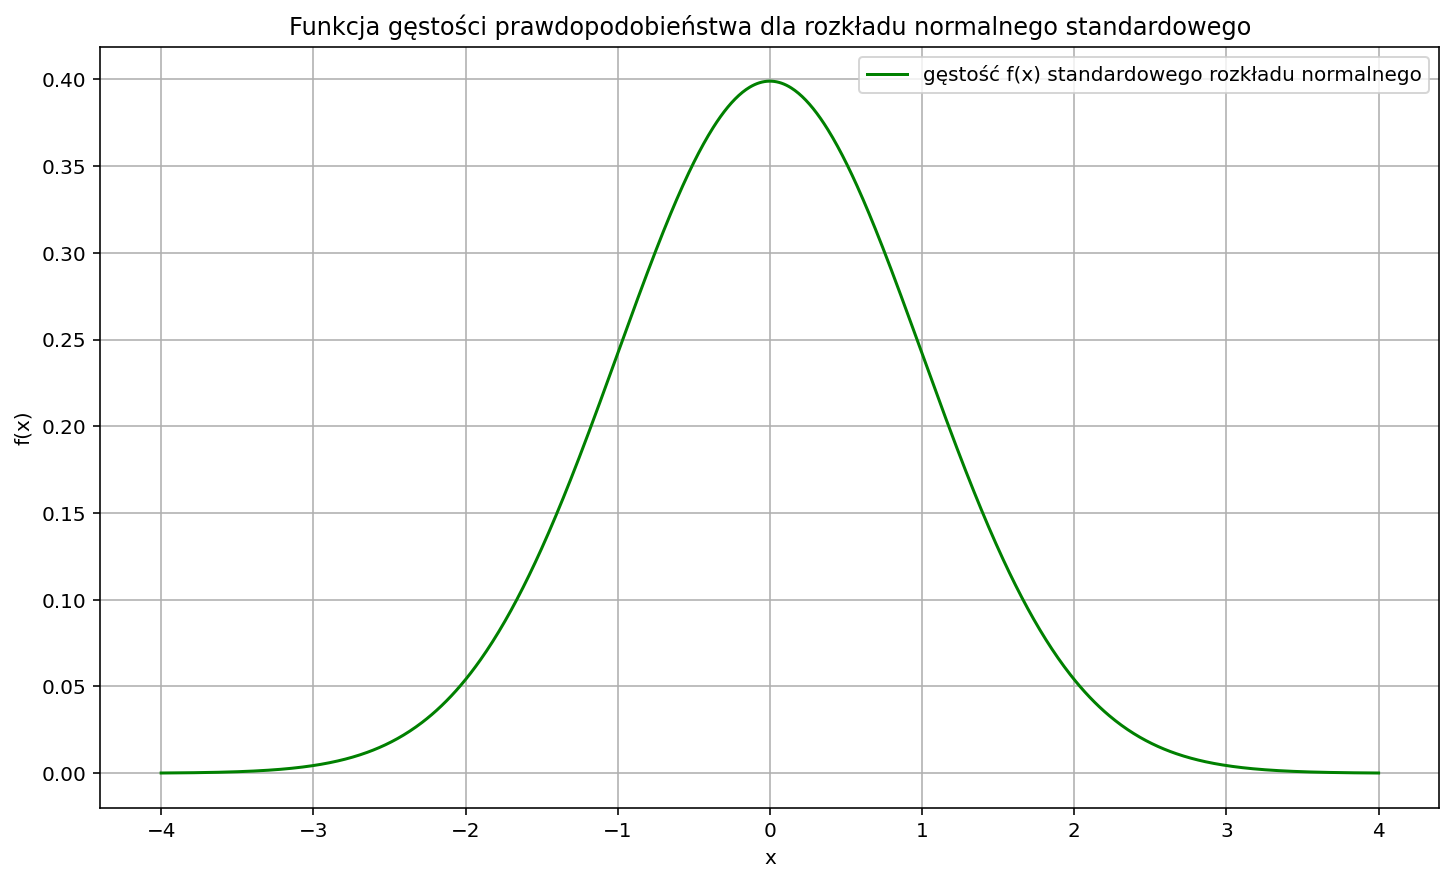

In [45]:
# argumenty x gęstości standardowego rozkładu normalnego
x = np.linspace(-4, 4, 1000)
pdf_values = stats.norm.pdf(x)

# tworzenie wykresu
plt.plot(x, pdf_values, label='gęstość f(x) standardowego rozkładu normalnego', color='green')
plt.title('Funkcja gęstości prawdopodobieństwa dla rozkładu normalnego standardowego')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend()
plt.show()

**Przykład 6**

Tym razem porównamy rozkład normalny z rozkładem Poissona. Ponieważ rozkład normalny jest rozkładem ciągłym, a rozkład Poissona jest rozkładem dyskretnym, porównamy dystrybuanty obu rozkładów na przykładzie zmiennych losowych $Z \sim \mathcal{N}(\mu, \sigma)$ i $Y \sim Po(\lambda)$. Parametry dobierzemy w taki sposób, aby
$$\mathbb{E}(Z) = \mu = \lambda = \mathbb{E}(Y) \quad \text{oraz} \quad Var(Z) = \sigma^2 = \lambda = Var(Y).$$
Okazuje się, że jeśli tylko $\lambda$ jest duża i zachodzą powyższe równości, to rozkład Poissona dobrze przybliża rozkład normalny. Zatem przyjmijmy, że $Z \sim \mathcal{N}(100, 10)$ i $Y \sim Po(100)$, a następnie narysujmy wykresy obydwu dystrybuant.

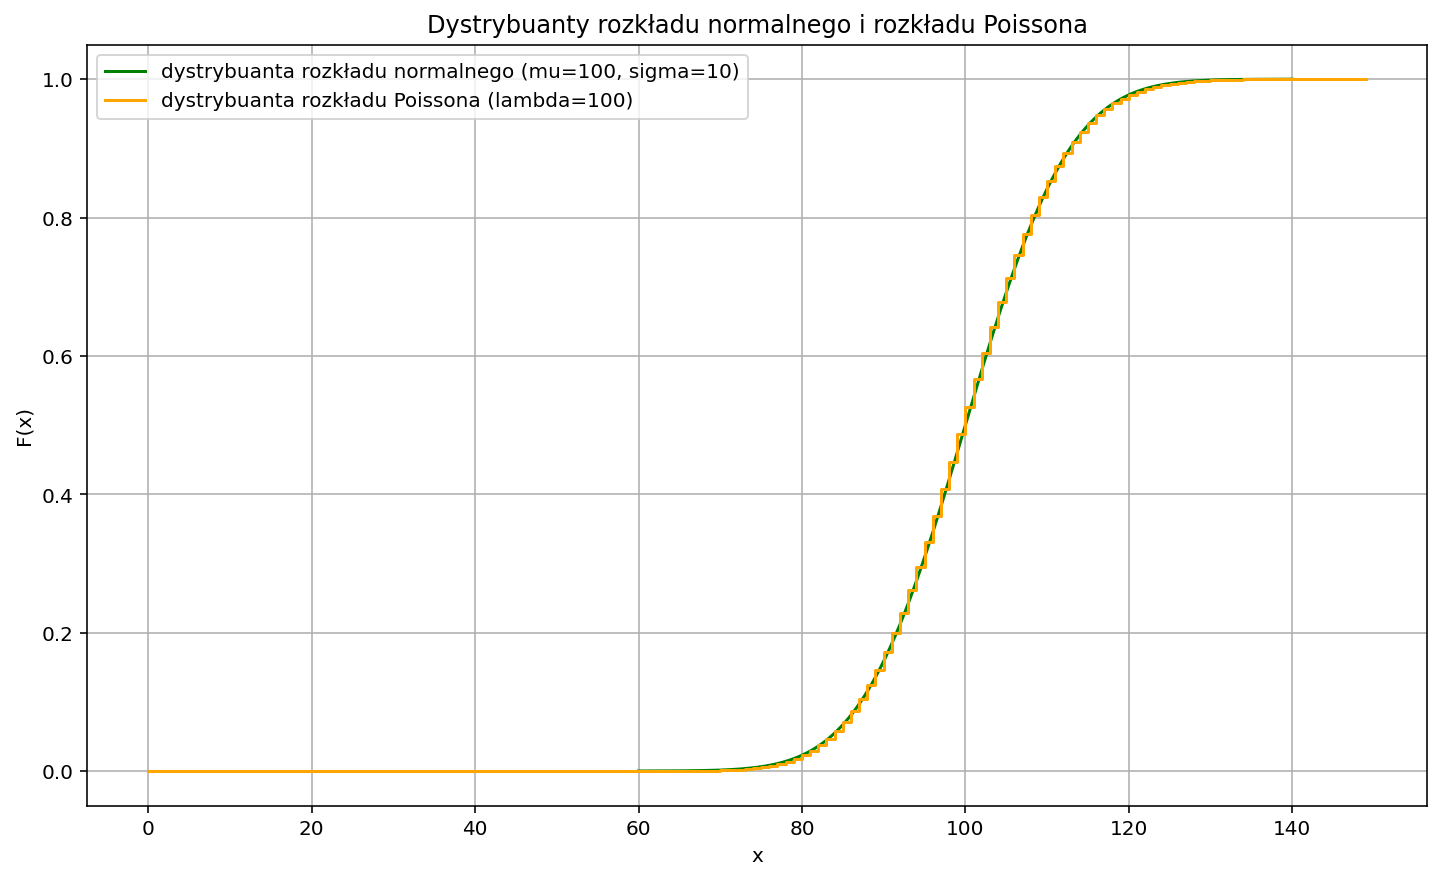

In [48]:
# definiujemy parametry dla rozkładu normalnego
mu = 100
sigma = 10
x_norm = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
cdf_norm = stats.norm.cdf(x_norm, mu, sigma)

# definiujemy parametry dla rozkładu Poissona
lambda_poisson = 100
x_poisson = np.arange(0, 150)  # Adjusted range for visualization
cdf_poisson = stats.poisson.cdf(x_poisson, lambda_poisson)

# tworzenie wykresu
plt.plot(x_norm, cdf_norm, label='dystrybuanta rozkładu normalnego (mu=100, sigma=10)', color='green')
plt.step(x_poisson, cdf_poisson, label='dystrybuanta rozkładu Poissona (lambda=100)', color='orange', where='post')

plt.title('Dystrybuanty rozkładu normalnego i rozkładu Poissona')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid()
plt.show()

## Bibliografia

Dokumentację dotyczącą omawianych pakietów można znaleźć na stronach:
* [NumPy](https://numpy.org/doc/stable/#)
* [SciPy](https://docs.scipy.org/doc/scipy/index.html)
* [Matplotlib](https://matplotlib.org/stable/users/index)